# Rank envelope tests

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean

import sys
sys.path.append("../")
import zerosSpectrogram

## Rank envelope tests example

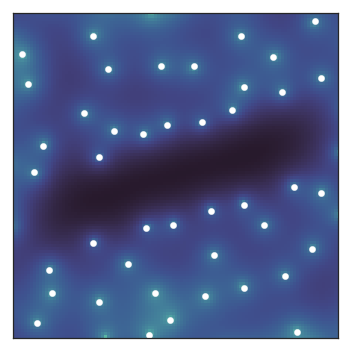

In [10]:
# generate a chirp signal in wgn
base = 128
duration = base - 20
SNR = 20
Sww, pos_exp, stft, chirp = zerosSpectrogram.experiments.demoSpectrogramSignal(SNR, duration, viz=True)

In [11]:
# MonteCarlo estimation of variabilty of L functions
base = 128

run_MC = 199

radius = np.linspace(0, .5*(base)/np.sqrt(2*base))

tinfty = np.zeros((run_MC, len(radius)))
t2 = np.zeros_like(tinfty)

for i in range(run_MC):
    
    pos = zerosSpectrogram.experiments.demoSpectrogramSignal(0, duration)
    __, L = zerosSpectrogram.spatialstats.LFromRSpecRadius(pos, radius)
    
    t2_ind, tinfty_ind = zerosSpectrogram.spatialstats.computeTStatistics(radius, L[2])
    
    t2[i, :] = t2_ind
    tinfty[i, :] = tinfty_ind

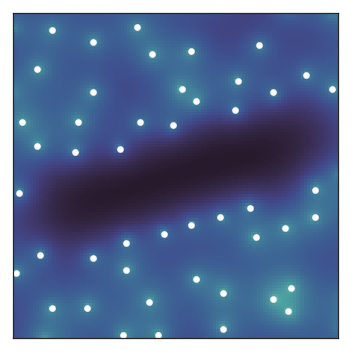

In [12]:
alpha = 0.05 # significance level
k = int(np.floor(alpha*(run_MC+1))) # corresponding k value

np.random.seed(0)

SNR = 50

# compute experiment
Sww, pos_exp, stft, chirp = zerosSpectrogram.experiments.demoSpectrogramSignal(SNR, duration, viz=True)
__, L = zerosSpectrogram.spatialstats.LFromRSpecRadius(pos_exp, radius)

t2_exp, tinfty_exp = zerosSpectrogram.spatialstats.computeTStatistics(radius, L[2])

# sorting
t2 = np.sort(t2, axis=0)[::-1, :]
tinfty = np.sort(tinfty, axis=0)[::-1, :]

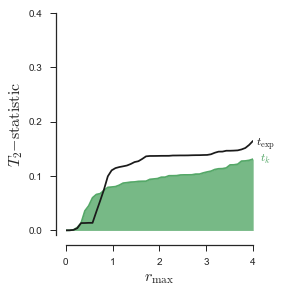

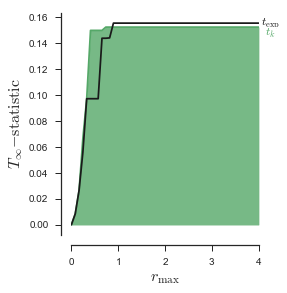

In [13]:
zerosSpectrogram.utils.plotRankEnvRes(radius, k, t2, tinfty, t2_exp, tinfty_exp)

## Assessing the power of the test

In [14]:
# differents value of amplitude 1, 5, 10 corresponding to various SNRs

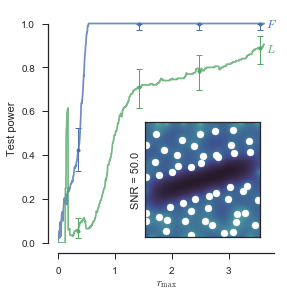

In [15]:
zerosSpectrogram.experiments.rankEnvelopePowerSNR(10, 1, inset_pos=[0.5, 0.2, 0.4, 0.4 ])

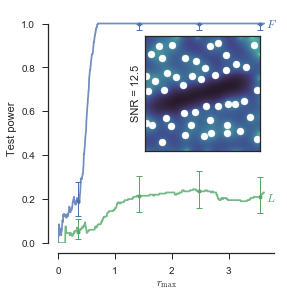

In [16]:
zerosSpectrogram.experiments.rankEnvelopePowerSNR(5, 1)

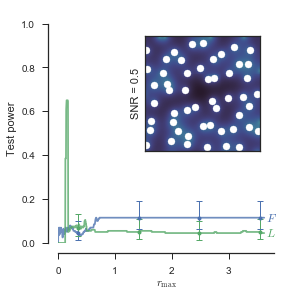

In [17]:
zerosSpectrogram.experiments.rankEnvelopePowerSNR(1, 1)

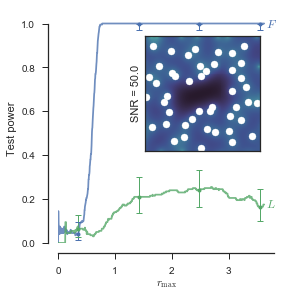

In [18]:
zerosSpectrogram.experiments.rankEnvelopePowerSNR(10, .5)

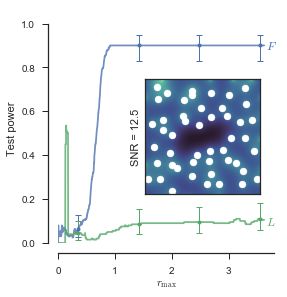

In [19]:
zerosSpectrogram.experiments.rankEnvelopePowerSNR(5, .5, inset_pos=[0.5, 0.35, 0.4, 0.4 ])

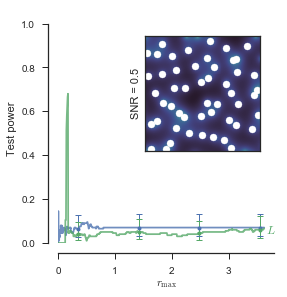

In [20]:
zerosSpectrogram.experiments.rankEnvelopePowerSNR(1, .5)